# Midterm Project (Python Part)

### Library

In [163]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as offline
import plotly.express as px
import plotly.graph_objs as go

## 1. Marginal Histogram (Matplotlib)
----

In [149]:
data = pd.read_csv('RaceDataEntry.csv')
df = pd.DataFrame(data)
new = df[df['Date'] == 20201101]
new = new[['Cases_Asian', 'Cases_Black', 'Cases_LatinX','Cases_White',
           'Deaths_Asian', 'Deaths_Black', 'Deaths_LatinX', 'Deaths_White']]
new = new.dropna(axis=0, how='any') # drop all rows that have any NaN values
new.head()

,Cases_Asian,Cases_Black,Cases_LatinX,Cases_White,Deaths_Asian,Deaths_Black,Deaths_LatinX,Deaths_White
60,2745.0,7621.0,75735.0,65521,68.0,185.0,1793.0,2540.0
61,36626.0,27719.0,401503.0,116385,2060.0,1308.0,8506.0,5269.0
62,1879.0,3835.0,38963.0,42337,59.0,124.0,488.0,1308.0
63,994.0,8329.0,13807.0,23943,50.0,674.0,412.0,3373.0
65,350.0,6488.0,5379.0,10018,1.0,183.0,50.0,463.0


In [150]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

x1 = new['Cases_Asian']
y1 = new['Deaths_Asian']
x2 = new['Cases_Black']
y2 = new['Deaths_Black']
x3 = new['Cases_LatinX']
y3 = new['Deaths_LatinX']
x4 = [float(x) for x in new['Cases_White']]
y4 = new['Deaths_White']

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

In [151]:
xmax = max(np.max(x1), np.max(x2), np.max(x3))
ymax = max(np.max(y1), np.max(y2), np.max(y3))
binsx = np.arange(0, xmax + 1000, 9000)
binsy = np.arange(0, ymax + 200, 200)

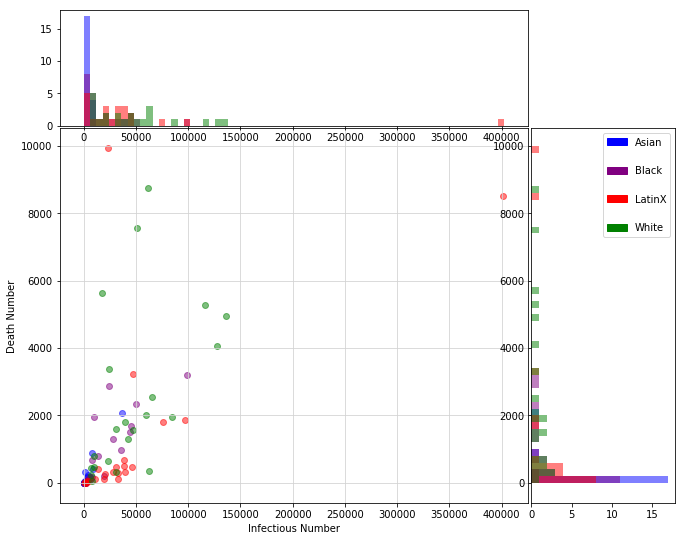

In [153]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes(rect_scatter)
plt.xlabel('Infectious Number')
plt.ylabel('Death Number')
plt.grid(color='LightGrey')
blue_patch = mpatches.Patch(color='blue', label='Asian')
purple_patch = mpatches.Patch(color='purple', label='Black')
red_patch = mpatches.Patch(color='red', label='LatinX')
green_patch = mpatches.Patch(color='green', label='White')
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)
plt.legend(handles=[blue_patch, purple_patch, red_patch, green_patch], loc = 'best')

ax.scatter(x1, y1, color = 'blue', alpha = 0.5)
ax_histx.hist(x1, bins=binsx, color = 'blue', alpha = 0.5)
ax_histy.hist(y1, bins=binsy, orientation='horizontal', color = 'blue', alpha = 0.5)
ax.scatter(x2, y2, color = 'purple', alpha = 0.5)
ax_histx.hist(x2, bins=binsx, color = 'purple', alpha = 0.5)
ax_histy.hist(y2, bins=binsy, orientation='horizontal', color = 'purple', alpha = 0.5)
ax.scatter(x3, y3, color = 'red', alpha = 0.5)
ax_histx.hist(x3, bins=binsx, color = 'red', alpha = 0.5)
ax_histy.hist(y3, bins=binsy, orientation='horizontal', color = 'red', alpha = 0.5)
ax.scatter(x4, y4, color = 'green', alpha = 0.5)
ax_histx.hist(x4, bins=binsx, color = 'green', alpha = 0.5)
ax_histy.hist(y4, bins=binsy, orientation='horizontal', color = 'green', alpha = 0.5)

plt.show()

## 2. Bubble Plot 
----

In [ ]:
from urllib.request import urlopen

In [155]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
data2 = pd.read_csv(url, low_memory=False)
df2 = pd.DataFrame(data2)

#### Data Preprocessing

In [148]:
new2 = df2[df2['date'] == '2020-10-20']
new2 = new2[['continent', 'total_deaths_per_million', 
             'stringency_index', 'human_development_index']]
new2 = new2.dropna(axis=0, how='any')
new2.head()

,continent,total_deaths_per_million,stringency_index,human_development_index
294,Asia,38.455,16.67,0.498
542,Europe,157.759,54.63,0.785
859,Africa,42.530,75.93,0.754
1108,Europe,802.433,53.70,0.858
1343,Africa,7.515,71.30,0.581


In [78]:
x = new2['stringency_index']
y = new2['human_development_index']
colors = {'Africa':'red', 'Asia':'blue', 'Europe':'green',
          'North America':'purple', 'Oceania': 'gold',
          'South America': 'pink'}
area = new2['total_deaths_per_million']

### Using matplotlib

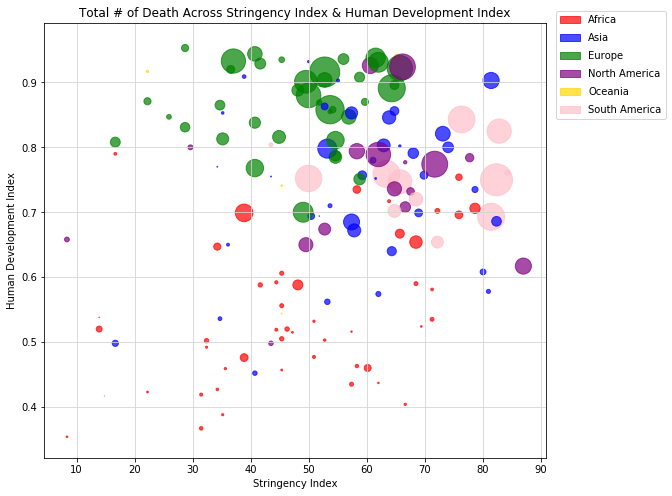

In [101]:
# draw plot using matplotlib
sizes = [0.1, 1, 10, 100, 1000]
labels = ['Tiny', 'Small', 'Medium', 'Large', 'Huge']
continent_list = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
color_list = ['red', 'blue', 'green', 'purple', 'gold', 'pink']
l = []
for i in range(6):
    l.append(mpatches.Patch( color=color_list[i],
                             alpha=0.7,
                             label=continent_list[i]))
    
plt.figure(figsize = (9,8))
plt.scatter('stringency_index',
            'human_development_index',
            s='total_deaths_per_million',
            c=new2['continent'].apply(lambda x: colors[x]),
            alpha=0.7,
            data=new2)
plt.grid(color='LightGrey')
plt.xlabel('Stringency Index')
plt.ylabel('Human Development Index')
plt.title('Total # of Death Across Stringency Index & Human Development Index')
legend1 = plt.legend(handles=l, loc = (1.02,0.78))
plt.show()

### Using seaborn

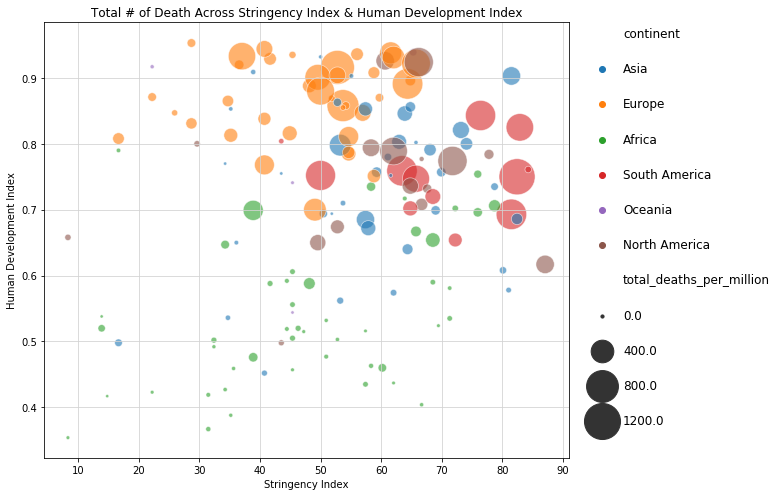

In [147]:
# draw plot using seaborn
plt.figure(figsize=(11, 7))
sns.scatterplot(x='stringency_index',
                y='human_development_index',
                size=new2['total_deaths_per_million'],
                sizes=(10,1300),
                alpha=0.6,
                hue=new2['continent'],
                data=new2)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.03, 1),borderaxespad=0,
           prop={'size':12}, handlelength=2,
          frameon=False)
plt.rcParams.update({'legend.labelspacing':1.85})
plt.xlabel('Stringency Index')
plt.ylabel('Human Development Index')
plt.title('Total # of Death Across Stringency Index & Human Development Index')
plt.grid(color='LightGrey')
plt.tight_layout()
plt.savefig("Bubble_plot_Seaborn_color_by_variable_Seaborn_scatterplot.png",
                    format='png',dpi=150)

## 3. Interactive Plot (Plotly)

In [158]:
import plotly.offline as offline
import plotly.express as px
import plotly.graph_objs as go

In [159]:
new3 = df2[df2['date'] == '2020-10-20']
new3 = new3[['location', 'total_cases_per_million', 'total_deaths_per_million',
             'hosp_patients_per_million',  'total_tests_per_thousand']]
new3 = new3.dropna(axis=0, how='any')[0:5]
new3.head()

,location,total_cases_per_million,total_deaths_per_million,hosp_patients_per_million,total_tests_per_thousand
3252,Austria,7395.963,102.039,82.608,218.961
5252,Belgium,22608.601,906.846,256.178,370.347
8186,Bulgaria,4393.357,145.068,224.798,88.278
12549,Croatia,6326.749,91.102,139.820,99.024
13592,Czech Republic,16991.531,141.283,412.458,176.159


In [162]:
branches = new3['location']
total_cases_per_million = np.log10(new3['total_cases_per_million'])
total_deaths_per_million = np.log10(new3['total_deaths_per_million'])
hosp_patients_per_million = np.log10(new3['hosp_patients_per_million'])
total_tests_per_thousand = np.log10(new3['total_tests_per_thousand']*1000)

trace1 = go.Bar(
   x = branches,
   y = total_cases_per_million,
   name = 'total_cases_per_million'
)
trace2 = go.Bar(
   x = branches,
   y = total_deaths_per_million,
   name = 'total_deaths_per_million'
)
trace3 = go.Bar(
   x = branches,
   y = hosp_patients_per_million,
   name = 'hosp_patients_per_million'
)
trace4 = go.Bar(
   x = branches,
   y = total_tests_per_thousand,
   name = 'total_tests_per_thousand'
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(title = 'Comparison of Cases, Deaths, Hospitalizations, and Testings', barmode = 'group')
fig = go.Figure(data = data, layout = layout)
fig.update_xaxes(title_text='Countries')
fig.update_yaxes(title_text='Log10 (# per million)')
fig.update_layout
offline.plot(fig, filename='interactive.html')

'interactive.html'